<a href="https://colab.research.google.com/github/nichakornchaisuwan/Project_Boneage/blob/main/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra # เป็นการ import numpy เพื่อเปิดใช้ฟังก์ชันในการทำงาน
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) # เป็น library ในการจัดการ dataframe
import tensorflow as tf #library สำหรับสร้าง machine learning models แบบ open source จาก Google
import datetime,os # datetime ใช้ในการจัด format ของวัน-เวลาให้อยู่ในรูปแบบที่ต้องการ 
import math # เรียกใช้ module เพื่อคำนวณค่าต่างๆ 
import matplotlib.pyplot as plt # เป็น module พื้นฐานที่ใช้ในการสร้างกราฟของ python
import seaborn as sns # เป็นฟังก์ชันเสริมที่ใช้สร้างกราฟให้มีความสวยงามมากขึ้น
from sklearn.model_selection import train_test_split # เป็น library ในการพัฒนาโปรแกรมโดยใช้การเรียนรู้ของเครื่อง

In [2]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่าMounted at /content/drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์

In [4]:
path = '/content/drive/My Drive/Project_Boneage'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

In [5]:
#loading dataframes # เอาที่อยู่ของไฟล์เชื่อมกับที่อยู่ของไฟล์เรา โดยกำหนดชื่่อไฟล์ที่เราต้องการ
train_path = os.path.join(path,'train.csv')
train_df = pd.read_csv(train_path)
val_path = os.path.join(path,'validation.csv')
val_df = pd.read_csv(val_path)
test_path = os.path.join(path,'boneage-test-dataset.csv')
test_df = pd.read_csv(test_path)

In [6]:
#appending file extension to id column for both training and testing dataframes
# ต่อท้าย data ใน column 'id' ด้วย .png
train_df['id'] = train_df['id'].apply(lambda x: str(x)+'.png') # ทำการเปลี่ยน type ใน column 'id' จาก int  เป็น string เพื่อให้สามารถต่อท้ายด้วย .png ได้ # ฟังก์ชันแลมบ์ดาเป็นฟังก์ชันที่ไม่ระบุตัวตนขนาดเล็ก
val_df['id'] = val_df['id'].apply(lambda x: str(x)+'.png') 
test_df['Case ID'] = test_df['Case ID'].apply(lambda x: str(x)+'.png') 

train_df.head() # แสดงค่าของ train_df บางส่วน

,id,boneage,male
0,1377.png,180,False
1,1378.png,12,False
2,1379.png,94,False
3,1380.png,120,True
4,1381.png,82,False


In [7]:
#finding out the number of male and female children in the dataset
#creating a new column called gender to keep the gender of the child as a string
train_df['gender'] = train_df['male'].apply(lambda x: 'male' if x else 'female') # ทำการเปลี่ยนค่าข้อมูล gender จาก true -> male, false -> female 
val_df['gender'] = val_df['male'].apply(lambda x: 'male' if x else 'female') # ทำการเปลี่ยนค่าข้อมูล gender จาก true -> male, false -> female 

In [8]:
mean_bone_age_train = train_df['boneage'].mean() 
std_bone_age_train = train_df['boneage'].std()
train_df['bone_age_z'] = (train_df['boneage'] - mean_bone_age_train)/(std_bone_age_train)
print(train_df.head())

         id  boneage   male  gender  bone_age_z
0  1377.png      180  False  female    1.278306
1  1378.png       12  False  female   -2.796338
2  1379.png       94  False  female   -0.807524
3  1380.png      120   True    male   -0.176924
4  1381.png       82  False  female   -1.098570


In [9]:
mean_bone_age_val = val_df['boneage'].mean() 
std_bone_age_val = val_df['boneage'].std()
val_df['bone_age_z'] = (val_df['boneage'] - mean_bone_age_val)/(std_bone_age_val)
print(val_df.head())

          id  boneage   male  gender  bone_age_z
0  10186.png       10   True    male   -2.864366
1  10758.png       15  False  female   -2.742400
2  10860.png      180  False  female    1.282468
3  10877.png      180  False  female    1.282468
4  11008.png      180  False  female    1.282468


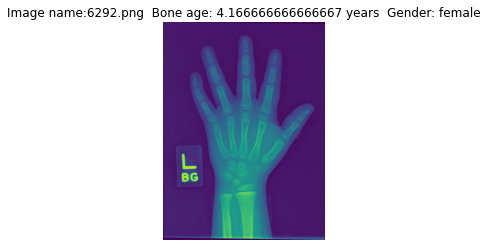

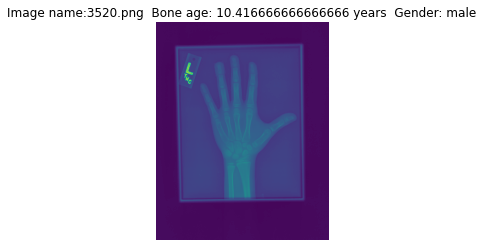

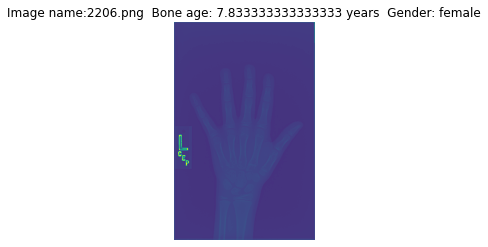

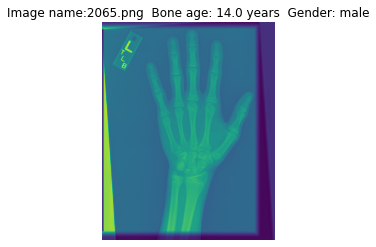

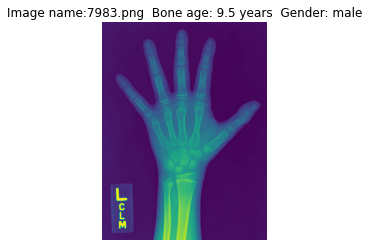

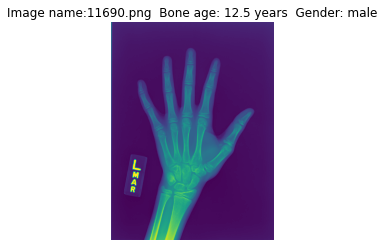

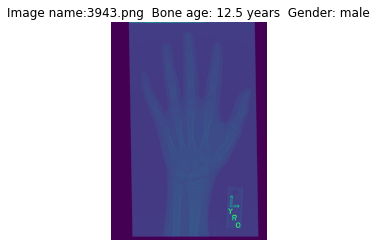

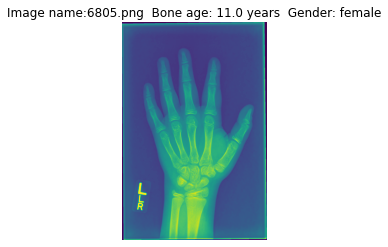

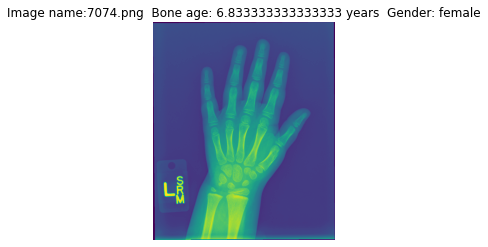

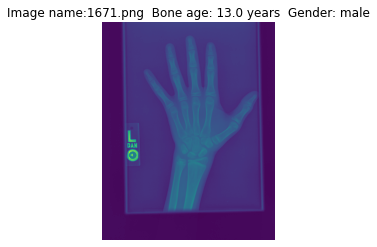

In [10]:
import matplotlib.image as mpimg #นำเข้า library ที่ใช้อ่านรูป
for filename, boneage, gender in train_df[['id','boneage','gender']].sample(10).values: #เป็นคำสั่งวนลูปเพื่อแสดงภาพ และข้อมูลของภาพที่เก็บไว้ใน Train_df (ชื่อ อายุ เพศ)
    img = mpimg.imread(os.path.join(path,'boneage_training_dataset/')+ filename) # เป็นคำสั่งที่ใช้ในการนำรูปเข้ามา
    plt.imshow(img) # แสดงรูปภาพ
    plt.title('Image name:{}  Bone age: {} years  Gender: {}'.format(filename, boneage/12, gender)) # แสดงหัวเรื่องโดยบอกถึง ชื่อ อายุ(ปี) และเพศ ของแต่ละภาพ
    plt.axis('off')
    plt.show()

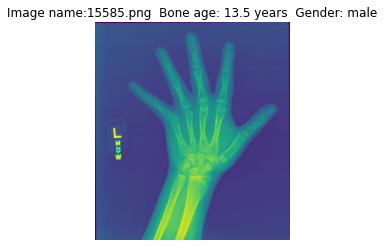

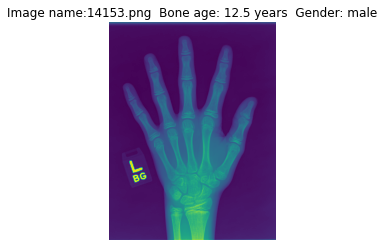

In [11]:
import matplotlib.image as mpimg #นำเข้า library ที่ใช้อ่านรูป
for filename, boneage, gender in val_df[['id','boneage','gender']].sample(2).values: #เป็นคำสั่งวนลูปเพื่อแสดงภาพ และข้อมูลของภาพที่เก็บไว้ใน Train_df (ชื่อ อายุ เพศ)
    img = mpimg.imread(os.path.join(path,'boneage_validation_dataset/')+ filename) # เป็นคำสั่งที่ใช้ในการนำรูปเข้ามา
    plt.imshow(img) # แสดงรูปภาพ
    plt.title('Image name:{}  Bone age: {} years  Gender: {}'.format(filename, boneage/12, gender)) # แสดงหัวเรื่องโดยบอกถึง ชื่อ อายุ(ปี) และเพศ ของแต่ละภาพ
    plt.axis('off')
    plt.show()

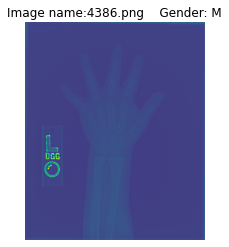

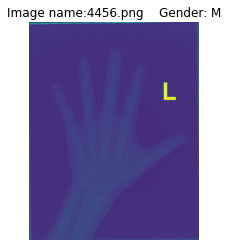

In [12]:
import matplotlib.image as mpimg #นำเข้า library ที่ใช้อ่านรูป
for filename, gender in test_df[['Case ID','Sex']].sample(2).values: #เป็นคำสั่งวนลูปเพื่อแสดงภาพ และข้อมูลของภาพที่เก็บไว้ใน Train_df (ชื่อ เพศ)
    img = mpimg.imread(os.path.join(path,'boneage-test-dataset/')+ filename) # เป็นคำสั่งที่ใช้ในการนำรูปเข้ามา
    plt.imshow(img) # แสดงรูปภาพ
    plt.title('Image name:{}    Gender: {}'.format(filename, gender)) # แสดงหัวเรื่องโดยบอกถึง ชื่อ อายุ(ปี) และเพศ ของแต่ละภาพ
    plt.axis('off')
    plt.show()
     

In [13]:
#library required for image preprocessing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from  keras.applications.xception import preprocess_input

In [14]:
#reducing down the size of the image 
img_size = 256 # ลดขนาดรูปภาพ

In [15]:
train_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
val_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

In [16]:
#train data generator
train_generator = train_data_generator.flow_from_dataframe(
    dataframe = train_df,
     directory = (os.path.join(path,'boneage_training_dataset/')),
    x_col= 'id',
    y_col= 'bone_age_z',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode= 'raw',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size, img_size))

Found 10089 validated image filenames.


In [17]:
#validation data generator
val_generator = val_data_generator.flow_from_dataframe(
    dataframe = val_df,
    directory = (os.path.join(path,'boneage_validation_dataset/')),
    x_col = 'id',
    y_col = 'bone_age_z',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'raw',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size, img_size))

Found 2522 validated image filenames.


In [18]:
#test data generator
test_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_data_generator.flow_from_directory(
    directory = (os.path.join(path,'boneage-test-dataset/')),
    target_size = (img_size,img_size),
    shuffle = True,
    class_mode = 'binary',classes=['.'],
    color_mode = 'rgb')

Found 200 images belonging to 1 classes.


In [19]:
test_X, test_Y = next(val_data_generator.flow_from_dataframe( 
                            val_df, 
                            directory = (os.path.join(path,'boneage_validation_dataset/')),
                            x_col = 'id',
                            y_col = 'bone_age_z', 
                            target_size = (img_size, img_size),
                            batch_size = 2523,
                            class_mode = 'raw'
                            )) 

Found 2522 validated image filenames.


#The function to plot training and validation error as a function of epochs

In [20]:
def plot_it(history):
    '''function to plot training and validation error'''
    fig, ax = plt.subplots( figsize=(20,10))
    ax.plot(history.history['mae_in_months'])
    ax.plot(history.history['val_mae_in_months'])
    plt.title('Model Error')
    plt.ylabel('error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    ax.grid(color='black')
    plt.show()

In [21]:
from keras.metrics import mean_absolute_error
def mae_in_months(x_p, y_p):
    '''function to return mae in months'''
    return mean_absolute_error((std_bone_age*x_p + mean_bone_age), (std_bone_age*y_p + mean_bone_age)) 

In [22]:
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense,Flatten
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import Sequential

In [23]:
model_1 = tf.keras.applications.xception.Xception(input_shape = (img_size, img_size, 3),
                                           include_top = False,
                                           weights = 'imagenet')
model_1.trainable = True
model_2 = Sequential()
model_2.add(model_1)
model_2.add(GlobalMaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(10, activation = 'relu'))
model_2.add(Dense(1, activation = 'linear'))


#compile model
model_2.compile(loss ='mse', optimizer= 'adam', metrics = [mae_in_months] )

#model summary
model_2.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 20,881,981
Trainable params: 20,827,453
Non

In [24]:
#early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience= 5,
                              verbose=0, mode='auto')

In [25]:
#model checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
mc

In [26]:
#tensorboard callback
logdir = os.path.join(logs_dir,datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback =  TensorBoard(logdir, histogram_freq = 1)
tensorboard_callback

NameError: ignored

In [ ]:
#reduce lr on plateau
red_lr_plat = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
red_lr_plat

In [ ]:
callbacks = [tensorboard_callback,early_stopping,mc,red_lr_plat]
callbacks

In [ ]:
#fit model
history = model_2.fit(train_generator,
                            steps_per_epoch = 131, # step_per_epoch = train_df/bach_size = 4208/32
                            validation_data = val_generator,
                            validation_steps = 1,
                            epochs = 50,
                            callbacks= callbacks)
history
%tensorboard --logdir logs
plot_it(history)